In [1]:
import pandas as pd

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("./income.csv")

In [4]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [5]:
from matplotlib import pyplot as plt

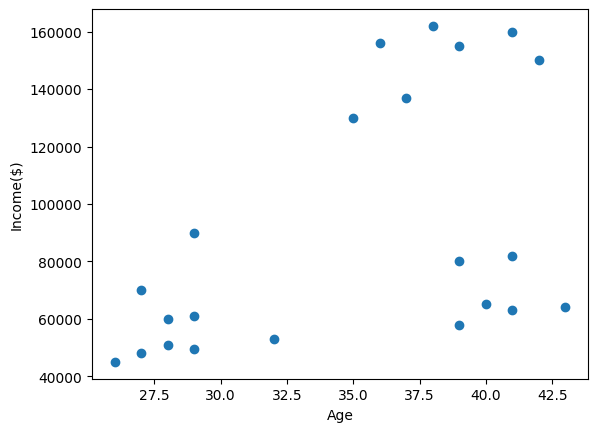

In [7]:
plt.scatter(data=data, x='Age', y="Income($)")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [8]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(data[['Age', 'Income($)']])
predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
data['Cluster'] = predicted

In [10]:
data.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

In [12]:
data0 = data[data['Cluster'] == 0]
data1 = data[data['Cluster'] == 1]
data2 = data[data['Cluster'] == 2]

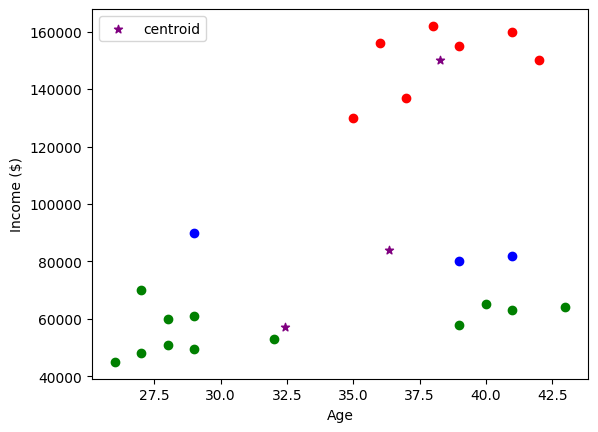

In [16]:
plt.scatter(data0['Age'], data0['Income($)'], color='green')
plt.scatter(data1['Age'], data1['Income($)'], color='red')
plt.scatter(data2['Age'], data2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#### Preprocessing

In [17]:
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)'] = scaler.transform(data[['Income($)']])
data['Age'] = scaler.fit_transform(data[['Age']])

In [18]:
data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


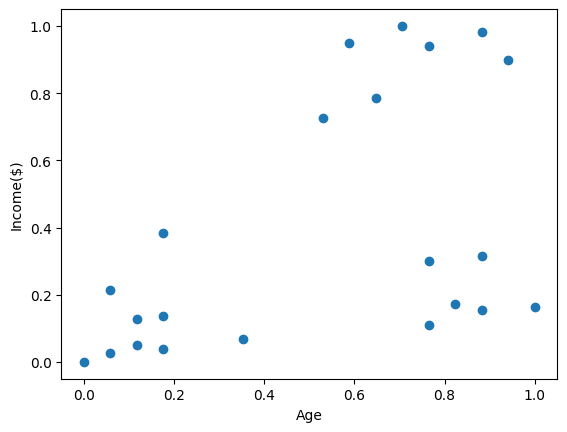

In [19]:
plt.scatter(data=data, x='Age', y="Income($)")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [20]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(data[['Age', 'Income($)']])
predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
data['Cluster'] = predicted

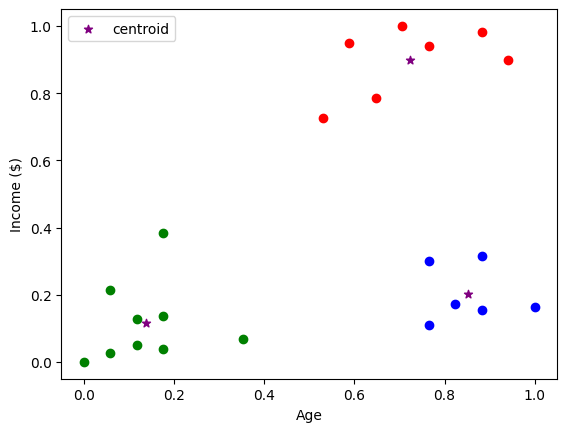

In [22]:
data0 = data[data['Cluster'] == 0]
data1 = data[data['Cluster'] == 1]
data2 = data[data['Cluster'] == 2]
plt.scatter(data0['Age'], data0['Income($)'], color='green')
plt.scatter(data1['Age'], data1['Income($)'], color='red')
plt.scatter(data2['Age'], data2['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

#### Elbow Method

In [23]:
sse = []
k_rng = range(1, 10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)

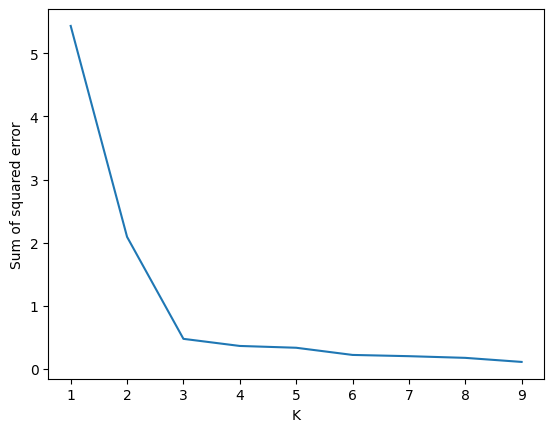

In [24]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)

#### Exercise

In [32]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['target'] = iris.target
iris_data['target_names'] = iris_data['target'].apply(lambda x: iris.target_names[x])


In [33]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [34]:
iris_data.drop(columns=['sepal length (cm)', 'sepal width (cm)', 'target_names', 'target'], inplace=True)

In [35]:
iris_data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


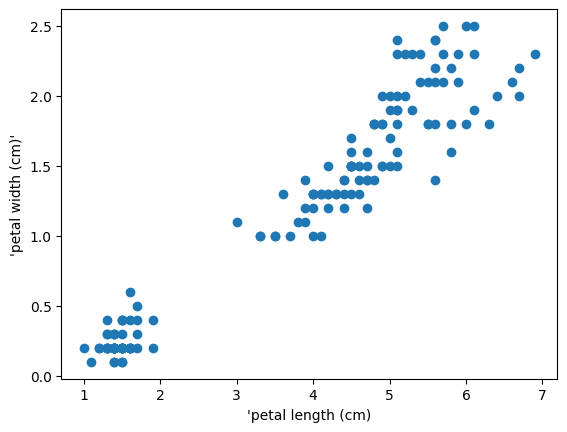

In [37]:
plt.scatter(data=iris_data, x='petal length (cm)', y='petal width (cm)')
plt.xlabel("'petal length (cm)")
plt.ylabel("'petal width (cm)'")
plt.show()

In [43]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(iris_data[['petal length (cm)','petal width (cm)']])
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
iris_data['Cluster'] = predicted

In [45]:
iris_data['Cluster'].value_counts()

Cluster
2    52
0    50
1    48
Name: count, dtype: int64

In [46]:
iris_data0 = iris_data[iris_data['Cluster'] == 0]
iris_data1 = iris_data[iris_data['Cluster'] == 1]
iris_data2 = iris_data[iris_data['Cluster'] == 2]

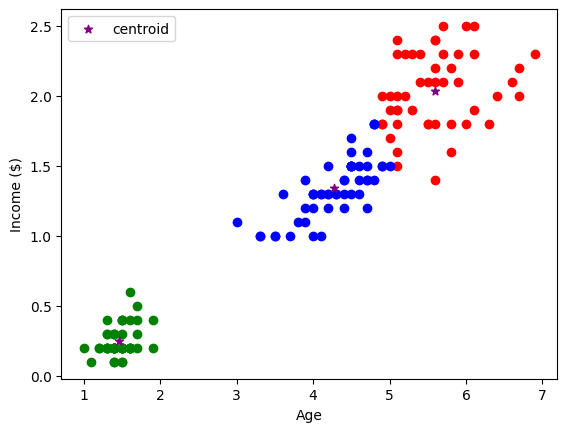

In [48]:

plt.scatter(iris_data0['petal length (cm)'], iris_data0['petal width (cm)'], color='green')
plt.scatter(iris_data1['petal length (cm)'], iris_data1['petal width (cm)'], color='red')
plt.scatter(iris_data2['petal length (cm)'], iris_data2['petal width (cm)'], color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [49]:
sse = []
k_rng = range(1, 10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(data[['Age', 'Income($)']])
    sse.append(km.inertia_)

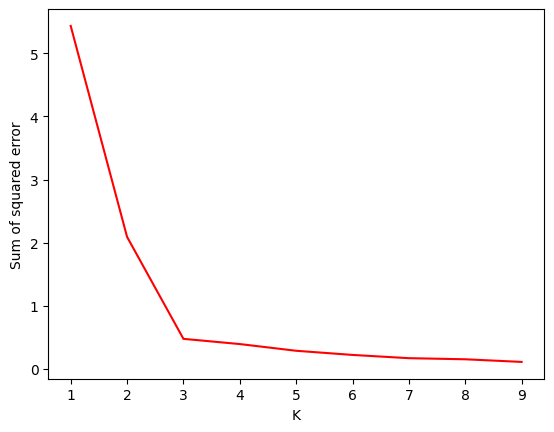

In [51]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse, color='red')